<div style="line-height:0.45">
<h1 style="color:#89B10D  "> KNN 2 </h1>
</div>
<div style="line-height:0.5">
<h4> K Nearest neighbors algorithm with graphs using scikit-network.
</h4>
</div>

In [11]:
import numpy as np
import pandas as pd

from IPython.display import SVG

from sknetwork.data import painters, karate_club
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.classification import NNClassifier, DiffusionClassifier

In [5]:
# Load the 'painters' graph data with metadata
graph = painters(metadata=True)

# Extract adjacency matrix, node names, and node positions from the graph
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [16]:
# To get the attributes just print the graph (need metadata=True)
graph

{'adjacency': <14x14 sparse matrix of type '<class 'numpy.bool_'>'
 	with 50 stored elements in Compressed Sparse Row format>,
 'names': array(['Pablo Picasso', 'Claude Monet', 'Michel Angelo', 'Edouard Manet',
        'Peter Paul Rubens', 'Rembrandt', 'Gustav Klimt', 'Edgar Degas',
        'Vincent van Gogh', 'Leonardo da Vinci', 'Henri Matisse',
        'Paul Cezanne', 'Pierre-Auguste Renoir', 'Egon Schiele'],
       dtype='<U21'),
 'position': array([[ 0.24,  0.53],
        [-0.47,  0.19],
        [-0.3 , -0.71],
        [-0.31,  0.44],
        [-0.08, -0.48],
        [ 0.12, -0.65],
        [ 0.78,  0.69],
        [-0.36, -0.11],
        [ 0.11,  0.01],
        [-0.06, -1.  ],
        [-0.02,  0.49],
        [-0.12,  0.28],
        [-0.24,  0.06],
        [ 0.73,  0.27]]),
 'name': 'painters'}

In [6]:
datas = pd.DataFrame(position, index=names)
datas

,0,1
Pablo Picasso,0.24,0.53
Claude Monet,-0.47,0.19
Michel Angelo,-0.30,-0.71
Edouard Manet,-0.31,0.44
Peter Paul Rubens,-0.08,-0.48
Rembrandt,0.12,-0.65
Gustav Klimt,0.78,0.69
Edgar Degas,-0.36,-0.11
Vincent van Gogh,0.11,0.01
Leonardo da Vinci,-0.06,-1.00


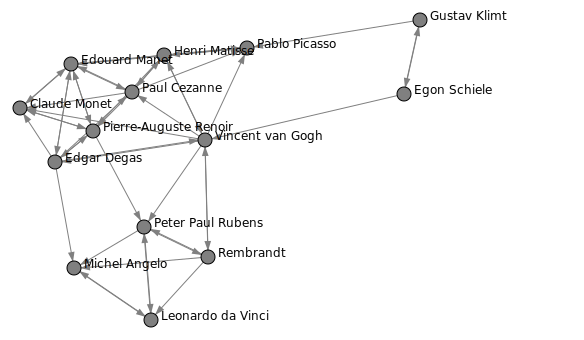

In [7]:
image = svg_graph(adjacency, position, names)

# Does not work unfortunately! It does not adjust the height and width attributes
#image = image.replace('<style>', '<style>svg {height: 5100px; width: 1800px;}')

SVG(image)

#### Karate Club

In [17]:
karate_graph = karate_club(metadata=True)
karate_graph

{'adjacency': <34x34 sparse matrix of type '<class 'numpy.bool_'>'
 	with 156 stored elements in Compressed Sparse Row format>,
 'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'position': array([[ 0.04, -0.33],
        [ 0.24, -0.15],
        [ 0.01, -0.01],
        [ 0.13, -0.28],
        [ 0.02, -0.64],
        [-0.08, -0.75],
        [ 0.04, -0.76],
        [ 0.21, -0.25],
        [ 0.08,  0.09],
        [-0.11,  0.23],
        [-0.13, -0.62],
        [-0.28, -0.4 ],
        [ 0.2 , -0.53],
        [ 0.08, -0.07],
        [ 0.23,  0.55],
        [ 0.06,  0.64],
        [-0.06, -1.  ],
        [ 0.32, -0.42],
        [ 0.15,  0.6 ],
        [ 0.19, -0.01],
        [ 0.27,  0.45],
        [ 0.39, -0.34],
        [-0.04,  0.61],
        [-0.26,  0.41],
        [-0.51,  0.14],
        [-0.49,  0.28],
        [-0.19,  0.68],
        [-0.28,  0.21],
        [-0.11,  0.12],
        [-0.17,  0.54],
        [ 

In [ ]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels = graph.labels

In [28]:
k_adjacency = karate_graph.adjacency
k_position = karate_graph.position
k_labels_true = karate_graph.labels
k_labels = {0: k_labels_true[0], 33: k_labels_true[33]}

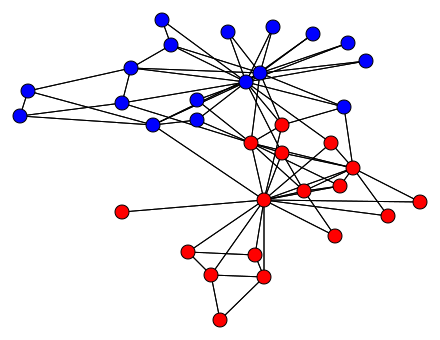

In [29]:
image = svg_graph(k_adjacency, k_position, labels=k_labels_true)
SVG(image)

In [30]:
# Node classification by heat diffusion.
diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_predict(adjacency, labels)
np.round(np.mean(labels_pred == k_labels_true), 2)

0.97

In [31]:
k_labels_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
attributes = karate_graph.position 
datas = pd.DataFrame(attributes)
datas

,0,1
0,0.04,-0.33
1,0.24,-0.15
2,0.01,-0.01
3,0.13,-0.28
4,0.02,-0.64
5,-0.08,-0.75
6,0.04,-0.76
7,0.21,-0.25
8,0.08,0.09
9,-0.11,0.23


In [32]:
position_array = karate_graph.position
position_df = pd.DataFrame(position_array)

position_df.head()

,0,1
0,0.04,-0.33
1,0.24,-0.15
2,0.01,-0.01
3,0.13,-0.28
4,0.02,-0.64


In [33]:
print(position_df.columns)
print(position_df.head())

RangeIndex(start=0, stop=2, step=1)
      0     1
0  0.04 -0.33
1  0.24 -0.15
2  0.01 -0.01
3  0.13 -0.28
4  0.02 -0.64
